In [47]:
import h5py
import numpy as np
import pandas as pd
import matplotlib as plt
import app.backend.DBController as dbc

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
def to_df(db, query, limit=None):
    if limit is None:
        cursor = db.find(query)
    else:
        cursor = db.find(query).limit(limit)

    df = pd.DataFrame(list(cursor))
    return df

In [3]:
rdb_controller = dbc.DBController().reviewDB
reviews_db = rdb_controller.get_reviews()
df = to_df(reviews_db, {})

In [4]:
df


,_id,user_id,anime_id,rating,description,title
0,605181610febcb00256d9bd0,1,20,-1,,
1,605181610febcb00256d9bd1,1,24,-1,,
2,605181610febcb00256d9bd2,1,79,-1,,
3,605181610febcb00256d9bd3,1,226,-1,,
4,605181610febcb00256d9bd4,1,241,-1,,
...,...,...,...,...,...,...
3399995,6051842a0febcb0025a17d0b,31320,18115,8,,
3399996,6051842a0febcb0025a17d0c,31320,18153,-1,,
3399997,6051842a0febcb0025a17d0d,31320,18247,-1,,
3399998,6051842a0febcb0025a17d0e,31320,18277,-1,,


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

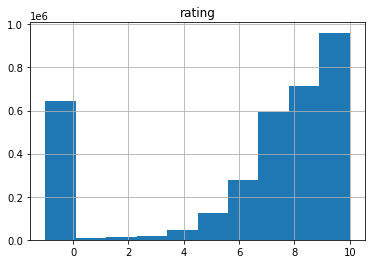

In [8]:
df.hist('rating', bins=10)

In [17]:
print("Number of unique users: ")
df.user_id.nunique()


Number of unique users: 


31320

In [19]:
print("Number of unique animes: ")
df.anime_id.nunique()

Number of unique animes: 


9657

In [23]:
df['rating'].min()

-1

In [24]:
df['rating'].max()


10

In [25]:
df.loc[df['rating'] == -1]

,_id,user_id,anime_id,rating,description,title
0,605181610febcb00256d9bd0,1,20,-1,,
1,605181610febcb00256d9bd1,1,24,-1,,
2,605181610febcb00256d9bd2,1,79,-1,,
3,605181610febcb00256d9bd3,1,226,-1,,
4,605181610febcb00256d9bd4,1,241,-1,,
...,...,...,...,...,...,...
3399987,6051842a0febcb0025a17d03,31320,17074,-1,,
3399992,6051842a0febcb0025a17d08,31320,17777,-1,,
3399996,6051842a0febcb0025a17d0c,31320,18153,-1,,
3399997,6051842a0febcb0025a17d0d,31320,18247,-1,,


In [27]:
df.drop(df[df['rating'] == -1].index, inplace=True)

In [28]:
df

,_id,user_id,anime_id,rating,description,title
47,605181610febcb00256d9bff,1,8074,10,,
81,605181610febcb00256d9c21,1,11617,10,,
83,605181610febcb00256d9c23,1,11757,10,,
101,605181610febcb00256d9c35,1,15451,10,,
153,605181610febcb00256d9c69,2,11771,10,,
...,...,...,...,...,...,...
3399991,6051842a0febcb0025a17d07,31320,17729,7,,
3399993,6051842a0febcb0025a17d09,31320,17827,6,,
3399994,6051842a0febcb0025a17d0a,31320,17895,6,,
3399995,6051842a0febcb0025a17d0b,31320,18115,8,,


In [29]:
min_rating = df['rating'].min()
max_rating = df['rating'].max()
print("Min rating: ", min_rating)
print("Max rating: ", max_rating)

Min rating:  1
Max rating:  10


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

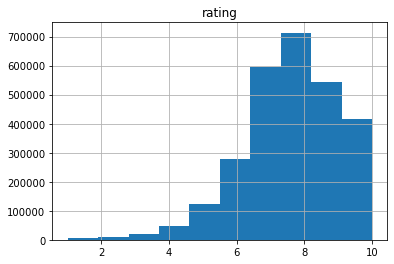

In [36]:
df.hist('rating', bins=10)

In [37]:
df = df.sample(frac=1, random_state=33)
features = df[['user_id', 'anime_id']].astype('int32').values

In [38]:
targets = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [39]:
features

array([[30267, 15315],
       [ 7571,   190],
       [ 2834, 16866],
       ...,
       [21160, 10213],
       [ 8521,  1575],
       [10438,  4186]], dtype=int32)

In [40]:
targets


array([0.88888889, 1.        , 0.77777778, ..., 1.        , 0.77777778,
       0.66666667])

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.2, random_state=33)

In [43]:
X_train
Y_train

X_test
Y_test

array([0.66666667, 0.44444444, 0.66666667, ..., 0.66666667, 0.77777778,
       1.        ])

In [44]:
print("Avg rating (train): ", Y_train.mean())
print("Standard deviation in rating (train): ", Y_train.std())


Avg rating (train):  0.7558239071205914
Standard deviation in rating (train):  0.17606892375961694


In [45]:
print("Avg rating (test): ", Y_test.mean())
print("Standard deviation in rating (test): ", Y_test.std())

Avg rating (test):  0.7555446727811737
Standard deviation in rating (test):  0.17575448732889212


In [48]:
def write(data, gts, outfile):
    '''
        This function writes the pre-processed image data to a HDF5 file
        Args:
          data: numpy.array, image data as numpy array
          outfile: string, path to write file to
    '''
    print("---------------------------------------")
    print("Saving data")
    print("---------------------------------------\n")
    with h5py.File(outfile, "w") as f:
        f.create_dataset("features", data=data, dtype=data.dtype)
        f.create_dataset("gts", data=gts, dtype=gts.dtype)

In [50]:
write(X_train, Y_train, "./data/train.hdf5")
write(X_test, Y_test, "./data/test.hdf5")

---------------------------------------
Saving data
---------------------------------------

---------------------------------------
Saving data
---------------------------------------

